<a href="https://colab.research.google.com/github/olowu289/Deep-learning-machine-learning-project/blob/main/kaggle_cassave_competition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olowudavid","key":"d1e02f4f6f809c71c5ae85e4009b42cf"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"olowudavid","key":"d1e02f4f6f809c71c5ae85e4009b42cf"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading our datasets
!kaggle competitions download -c paddy-disease-classification

 98% 1.00G/1.02G [01:00<00:00, 21.2MB/s]
100% 1.02G/1.02G [01:00<00:00, 18.1MB/s]


In [ ]:
# let unzip our data
!unzip /content/paddy-disease-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/downy_mildew/100992.jpg  
  inflating: train_images/downy_mildew/100995.jpg  
  inflating: train_images/downy_mildew/101015.jpg  
  inflating: train_images/downy_mildew/101020.jpg  
  inflating: train_images/downy_mildew/101022.jpg  
  inflating: train_images/downy_mildew/101024.jpg  
  inflating: train_images/downy_mildew/101034.jpg  
  inflating: train_images/downy_mildew/101050.jpg  
  inflating: train_images/downy_mildew/101078.jpg  
  inflating: train_images/downy_mildew/101096.jpg  
  inflating: train_images/downy_mildew/101103.jpg  
  inflating: train_images/downy_mildew/101114.jpg  
  inflating: train_images/downy_mildew/101119.jpg  
  inflating: train_images/downy_mildew/101142.jpg  
  inflating: train_images/downy_mildew/101177.jpg  
  inflating: train_images/downy_mildew/101178.jpg  
  inflating: train_images/downy_mildew/101181.jpg  
  inflating: train_images/downy_mildew/101205.jpg  
  inflating: 

In [ ]:
# downloading helper funtions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-15 06:39:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-15 06:39:29 (77.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# let walk through our directories
from helper_functions import walk_through_dir

In [ ]:
walk_through_dir("train_images")

There are 10 directories and 0 images in 'train_images'.
There are 0 directories and 1442 images in 'train_images/dead_heart'.
There are 0 directories and 380 images in 'train_images/bacterial_leaf_streak'.
There are 0 directories and 620 images in 'train_images/downy_mildew'.
There are 0 directories and 1738 images in 'train_images/blast'.
There are 0 directories and 1764 images in 'train_images/normal'.
There are 0 directories and 1594 images in 'train_images/hispa'.
There are 0 directories and 1088 images in 'train_images/tungro'.
There are 0 directories and 965 images in 'train_images/brown_spot'.
There are 0 directories and 479 images in 'train_images/bacterial_leaf_blight'.
There are 0 directories and 337 images in 'train_images/bacterial_panicle_blight'.


In [ ]:
# import ting the useful libaries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
# let create our training and test dir
train_dir="/content/train_images"
test_dir= "/content/test_images"

In [ ]:
# setting up our batch_size and images size
BATCH_SIZE = 32
IMAGE_SIZE= (380, 380)

In [ ]:
# let create our traning and test data
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                               label_mode="categorical",
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=BATCH_SIZE,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=42)

validation_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     label_mode="categorical",
                                                                     batch_size=BATCH_SIZE,
                                                                     image_size= IMAGE_SIZE,
                                                                     subset="validation",
                                                                     validation_split= 0.2,
                                                                     seed=42,)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [ ]:
# let create our class names 
class_names=train_data.class_names
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

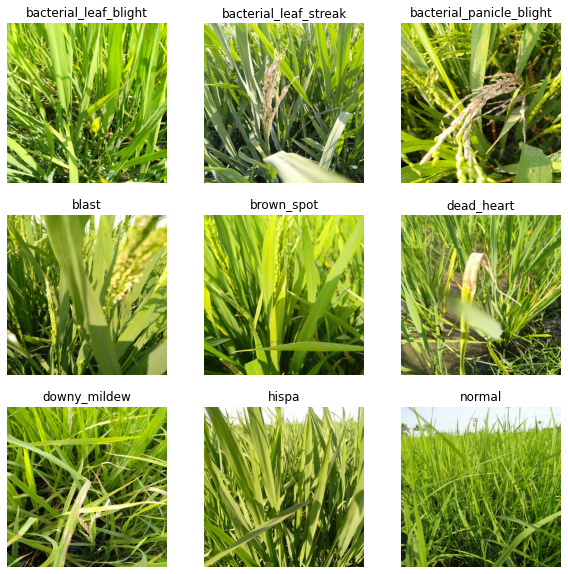

In [ ]:
# let view random images from our train_data

plt.figure(figsize=(10, 10))

for images, lables in train_data.take(1):
  for i in range(9):
    ax= plt.subplot(3, 3, i+1 )
    plt.imshow((images[i].numpy().astype('uint8')))
    plt.title(class_names[i])
    plt.axis(False)

In [ ]:
# Let set up our call back path
checkpoint_path= "Cassave_model_checkpoint"

checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                               monitor="val_loss",
                                               save_weights_only=True,
                                               save_best_model=False)



# we are setting this so that when traninig, our learning rate will be updated as we train our model
reduce_lr= tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                 patience= 2,
                                                 verbose=1,
                                                 min_delta=0.0001,
                                                 factor=0.2
                                                 )

### Creating DataAugmentation

we are seeting out dataugmentation so as to allow our model to futher find patters in it

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

In [ ]:
data_augmetation= tf.keras.Sequential([
      preprocessing.RandomZoom(0.2),
      preprocessing.RandomWidth(0.2),
      preprocessing.RandomRotation(0.2),
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomHeight(0.2),
      # preprocessing.Rescaling(1/255.)
      ])

In [ ]:
# View a random image and compare it to the original image
# let import the useful liabaries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
def plot_normal_and_augmented_image(target_class, target_dir):
  """
  Takes in a target class and a target dirctory("str") and retures a plot of images,
  showing the original and the augmented image

  Args:
   target_class: the class of the image (e.g train_data_1_percent)
   target_dir: the target directory in string(e.g"10_food_classes_1_persent_train)
   
  Returns:
   it returns a plot showing of random images from the directory(the original and augmented image ) 

   """
  target_class = random.choice(train_data.class_names)
  target_dir = "/content/train_images/" + target_class
  random_image = random.choice(os.listdir(target_dir))
  random_image_path= target_dir + "/" + random_image


  # let visualized our image
  img= mpimg.imread(random_image_path)
  plt.imshow(img)
  plt.title(f"Original random image from class: {target_class} ")
  plt.axis(False)

  # Now let plot our Augmented random image
  augmented_img = data_augmetation(img, training=True)
  augmented_img= augmented_img/255.
  plt.figure()
  plt.imshow(augmented_img)
  plt.title(f"Augemented random image from class: {target_class} ")
  plt.axis(False)

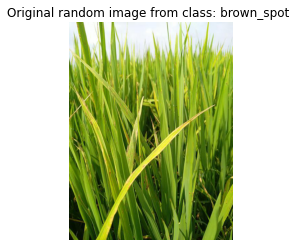

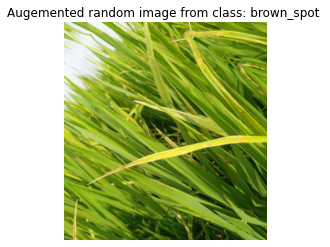

In [ ]:
# let view our augmented image
plot_normal_and_augmented_image(target_class="/content/train_images/", target_dir="blast")

In [ ]:
# for this model, i will be using the funtional API
# let import the use full liabaries
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Dropout, UpSampling2D, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras import Model
INPUT_SHAPE=(380, 380, 3)

In [ ]:
# let setup our base model

base_model= tf.keras.applications.resnet.ResNet101(include_top=False , input_shape=(380, 380, 3) )
base_model.trainable= False

# let set our input layer
input_layer= Input(shape=(INPUT_SHAPE), name="input_layer")

# let pass our input_layer to our data augmentation layer
# x= data_augmetation(input_layer)

x=tf.keras.applications.resnet50.preprocess_input(input_layer) 
# let pass our augmented image into our baseline model
x= base_model(x, training=False)
# let now pass it to our global_average_pooling layer
x= GlobalAveragePooling2D(name="global_avarage_pooling_layer")(x)
x= Dense(1024, activation= "relu")(x)
x= Dense(1024, activation= "relu")(x)
# x= Dropout(0.1)(x)
x=Dense(128, activation="relu")(x)
# x= Dropout(0.2)(x)
x=Dense(128, activation="relu")(x)
x=Dense(128, activation="relu")(x)
# let pass it to our output layer
output_layer= Dense(len(class_names), activation= "softmax")(x)

model= Model(input_layer, output_layer)

171458560/171446536 [==============================] - 7s 0us/step


In [ ]:
# let check summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 380, 380, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 380, 380, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 380, 380, 3)      0         
 a)                                                              
                                                                 
 resnet101 (Functional)      (None, 12, 12, 2048)      42658176  
                                                                 
 global_avarage_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                           

In [ ]:
# compiling our model
model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# let fit our model
model_history = model.fit(train_data,
                          epochs=15,
                          steps_per_epoch=len(train_data),
                          validation_data=validation_data,
                          validation_steps=len(validation_data),
                          callbacks=[checkpoint, reduce_lr])

Epoch 1/15
261/261 [==============================] - 165s 609ms/step - loss: 1.3128 - accuracy: 0.5460 - val_loss: 0.9929 - val_accuracy: 0.6785 - lr: 0.0010
Epoch 2/15
261/261 [==============================] - 157s 600ms/step - loss: 0.7942 - accuracy: 0.7340 - val_loss: 0.7273 - val_accuracy: 0.7554 - lr: 0.0010
Epoch 3/15
261/261 [==============================] - 158s 601ms/step - loss: 0.5610 - accuracy: 0.8087 - val_loss: 0.6288 - val_accuracy: 0.7987 - lr: 0.0010
Epoch 4/15
261/261 [==============================] - 157s 601ms/step - loss: 0.4206 - accuracy: 0.8585 - val_loss: 0.7205 - val_accuracy: 0.7775 - lr: 0.0010
Epoch 5/15
261/261 [==============================] - 157s 600ms/step - loss: 0.3698 - accuracy: 0.8748 - val_loss: 0.5218 - val_accuracy: 0.8313 - lr: 0.0010
Epoch 6/15
261/261 [==============================] - 157s 599ms/step - loss: 0.2944 - accuracy: 0.8990 - val_loss: 0.5225 - val_accuracy: 0.8385 - lr: 0.0010
Epoch 7/15
261/261 [==========================

In [ ]:
model.evaluate(validation_data, verbose=1)

In [ ]:
from helper_functions import plot_loss_curves

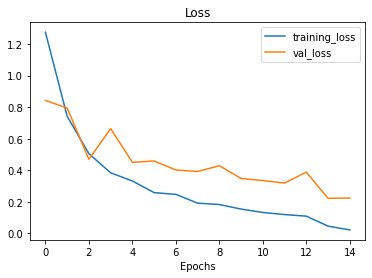

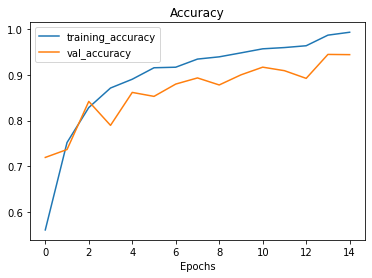

In [ ]:
plot_loss_curves(model_history)

In [ ]:

# let first set trainable == True
base_model.trainable = True

# let unfrezzed the last 15 layers
for layer in base_model.layers[:-20]:
  layer.trainable=False

# let recompile our model
model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
# let fit our model
history_fine_tune= model.fit(train_data,
                             epochs=35,
                             steps_per_epoch=len(train_data),
                             validation_data=validation_data,
                             initial_epoch= model_history.epoch[-1],
                             validation_steps=len(validation_data),
                             callbacks=[checkpoint, reduce_lr])

Epoch 15/35
261/261 [==============================] - 118s 434ms/step - loss: 0.1415 - accuracy: 0.9578 - val_loss: 0.2929 - val_accuracy: 0.9130 - lr: 1.0000e-04
Epoch 16/35
261/261 [==============================] - 112s 427ms/step - loss: 0.0680 - accuracy: 0.9783 - val_loss: 0.1964 - val_accuracy: 0.9491 - lr: 1.0000e-04
Epoch 17/35
261/261 [==============================] - 112s 425ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.2181 - val_accuracy: 0.9447 - lr: 1.0000e-04
Epoch 18/35
261/261 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9882
Epoch 18: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
261/261 [==============================] - 112s 426ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.2265 - val_accuracy: 0.9438 - lr: 1.0000e-04
Epoch 19/35
261/261 [==============================] - 112s 426ms/step - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.1708 - val_accuracy: 0.9587 - lr: 2.0000e-05
Epoch 20/35
261/2

In [ ]:
from helper_functions import compare_historys

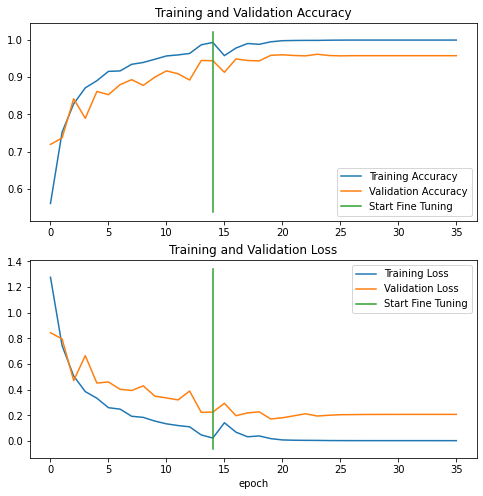

In [ ]:
compare_historys(model_history, history_fine_tune, initial_epochs=15)

In [ ]:
model.evaluate(validation_data)

66/66 [==============================] - 20s 288ms/step - loss: 0.2066 - accuracy: 0.9577


[0.20663350820541382, 0.9577126502990723]

In [ ]:
# let save our model
saved_model= tf.keras.models.save_model(model, "drive/MyDrive/cassava_model_using_reznet")

INFO:tensorflow:Assets written to: drive/MyDrive/cassava_model_using_reznet/assets


In [ ]:
# let setup our test directory and our image size
test_dir= "/content/test_images"
IMG_SIZE= 380
BATCH_SIZE=32

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
      test_dir,
    label_mode = None,
    seed=42,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = False)

Found 3469 files belonging to 1 classes.


In [ ]:
# let make predictions on our test data
y_pred =  model.predict(test_data, batch_size = 32, verbose = 1)
y_pred.shape

109/109 [==============================] - 34s 303ms/step


(3469, 10)

In [ ]:
pred_classes = y_pred.argmax(axis = 1)
pred_classes.shape

In [ ]:
pred_classes_names = [class_names[x] for x in pred_classes]
# let view our first 10 predictions
pred_classes_names[:10]

In [ ]:
predictions = pd.read_csv("/content/sample_submission.csv")
predictions['label'] = pred_classes_names
predictions.head()

In [ ]:
# let setup our test directory and our image size
test_dir= "/content/test_images"
IMG_SIZE= 224 
BATCH_SIZE=32

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
      test_dir,
    label_mode = None,
    seed=42,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = False)


Found 3469 files belonging to 1 classes.


In [ ]:
# let make predictions on our test data
y_pred =  model.predict(test_data, batch_size = 32, verbose = 1)
y_pred.shape

109/109 [==============================] - 14s 109ms/step


(3469, 10)

In [ ]:
pred_classes = y_pred.argmax(axis = 1)
pred_classes.shape

(3469,)

In [ ]:
pred_classes_names = [class_names[x] for x in pred_classes]
# let view our first 10 predictions
pred_classes_names[:10]

['hispa',
 'normal',
 'blast',
 'blast',
 'blast',
 'brown_spot',
 'dead_heart',
 'brown_spot',
 'hispa',
 'normal']

In [ ]:
predictions = pd.read_csv("/content/sample_submission.csv")
predictions['label'] = pred_classes_names
predictions.head()

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast


In [ ]:
from google.colab import files

predictions.to_csv('predictions.csv', encoding = 'utf-8-sig', index=False) 
# files.download('predictions.csv')

In [ ]:
df=pd.read_csv("/content/predictions.csv")
df.head()

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast


In [ ]:
df.to_csv('Submissions.csv', encoding = 'utf-8-sig', index=False) 

In [ ]:
ds=pd.read_csv("/content/Submissions.csv")
ds.head()

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,bacterial_leaf_blight
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast


In [ ]:
!kaggle competitions submit -c paddy-disease-classification -f predictions.csv -m "USING RESNET"

100% 70.4k/70.4k [00:00<00:00, 178kB/s]
Successfully submitted to Paddy Doctor: Paddy Disease Classification